In [ ]:
import numpy as np
import operator
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class GridWorld:
    ## Initialise starting data
    def __init__(self):
        # Set information about the gridworld
        self.height = 8
        self.width = 8
        self.grid = np.zeros(( self.height, self.width)) - 1

        # Set random start location for the agent
        self.current_location = ( 4, np.random.randint(0,5))

        # Set locations for the bomb and the gold
        self.bomb_location = (1,3)
        self.gold_location = (0,3)
        self.terminal_states = [ self.bomb_location, self.gold_location]

        # Set grid rewards for special cells
        self.grid[ self.bomb_location[0], self.bomb_location[1]] = -10
        self.grid[ self.gold_location[0], self.gold_location[1]] = 10

        # Set available actions
        self.actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']


    ## Put methods here:
    def get_available_actions(self):
        """Returns possible actions"""
        return self.actions

    def agent_on_map(self):
        """Prints out current location of the agent on the grid (used for debugging)"""
        grid = np.zeros(( self.height, self.width))
        grid[ self.current_location[0], self.current_location[1]] = 1
        return grid

    def get_reward(self, new_location):
        """Returns the reward for an input position"""
        return self.grid[ new_location[0], new_location[1]]


    def make_step(self, action):
        """Moves the agent in the specified direction. If agent is at a border, agent stays still
        but takes negative reward. Function returns the reward for the move."""
        # Store previous location
        last_location = self.current_location

        # UP
        if action == 'UP':
            # If agent is at the top, stay still, collect reward
            if last_location[0] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] - 1, self.current_location[1])
                reward = self.get_reward(self.current_location)

        # DOWN
        elif action == 'DOWN':
            # If agent is at bottom, stay still, collect reward
            if last_location[0] == self.height - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] + 1, self.current_location[1])
                reward = self.get_reward(self.current_location)

        # LEFT
        elif action == 'LEFT':
            # If agent is at the left, stay still, collect reward
            if last_location[1] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] - 1)
                reward = self.get_reward(self.current_location)

        # RIGHT
        elif action == 'RIGHT':
            # If agent is at the right, stay still, collect reward
            if last_location[1] == self.width - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] + 1)
                reward = self.get_reward(self.current_location)

        return reward

    def check_state(self):
        """Check if the agent is in a terminal state (gold or bomb), if so return 'TERMINAL'"""
        if self.current_location in self.terminal_states:
            return 'TERMINAL'

In [ ]:
class RandomAgent():
    # Choose a random action
    def choose_action(self, available_actions):
        """Returns a random choice of the available actions"""
        return np.random.choice(available_actions)

In [ ]:
class Q_Agent():
    def __init__(self, environment, epsilon=0.05, alpha=0.1, gamma=1):
        self.environment = environment
        self.q_table = dict()
        for x in range(environment.height):
            for y in range(environment.width):
                self.q_table[(x,y)] = {'UP':0, 'DOWN':0, 'LEFT':0, 'RIGHT':0}
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma

    def choose_action(self, available_actions):
        """Epsilon-greedy policy: choose optimal or random action."""
        import random
        if random.random() < self.epsilon:
            return np.random.choice(available_actions)

        state = self.environment.current_location
        q_values = self.q_table[state]
        max_q = max([q_values[a] for a in available_actions])
        best_actions = [a for a in available_actions if q_values[a] == max_q]
        return np.random.choice(best_actions)

    def learn(self, old_state, reward, new_state, action):
        """Updates Q-value table using Q-learning formula"""
        old_q = self.q_table[old_state][action]
        max_future_q = max(self.q_table[new_state].values())
        self.q_table[old_state][action] = old_q + self.alpha * (reward + self.gamma * max_future_q - old_q)


In [ ]:
def play(environment, agent, trials=500, max_steps_per_episode=1000, learn=False):
    """Runs multiple episodes and updates Q-values if learning is enabled."""

    reward_per_episode = []  # Performance log

    for trial in range(trials):
        cumulative_reward = 0
        step = 0
        game_over = False

        while step < max_steps_per_episode and not game_over:
            old_state = environment.current_location
            action = agent.choose_action(environment.actions)
            reward = environment.make_step(action)
            new_state = environment.current_location

            if learn:
                agent.learn(old_state, reward, new_state, action)

            cumulative_reward += reward
            step += 1

            if environment.check_state() == 'TERMINAL':
                environment.__init__()  # Reset environment
                game_over = True

        reward_per_episode.append(cumulative_reward)

    return reward_per_episode


In [ ]:
class Q_Agent:
    def __init__(self, environment, epsilon=0.05, alpha=0.1, gamma=1):
        self.environment = environment
        self.q_table = dict()
        for x in range(environment.height):
            for y in range(environment.width):
                self.q_table[(x, y)] = {'UP': 0, 'DOWN': 0, 'LEFT': 0, 'RIGHT': 0}

        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma

    def choose_action(self, available_actions):
        """Epsilon-greedy policy: choose optimal or random action."""
        import random
        # Exploration
        if random.random() < self.epsilon:
            return np.random.choice(available_actions)
        # Exploitation
        state = self.environment.current_location  # use environment's current location
        q_values = self.q_table[state]
        max_q = max([q_values[a] for a in available_actions])
        best_actions = [a for a in available_actions if q_values[a] == max_q]
        return np.random.choice(best_actions)


    def learn(self, old_state, reward, new_state, action):
        old_q = self.q_table[old_state][action]
        max_future_q = max(self.q_table[new_state].values())
        new_q = old_q + self.alpha * (reward + self.gamma * max_future_q - old_q)
        self.q_table[old_state][action] = new_q

In [ ]:
# Initialize environment and agent
env = GridWorld()
agent = RandomAgent()

# Show initial agent position
print("Current position of the agent =", env.current_location)
print("Agent on map:\n", env.agent_on_map())

# Get available actions
available_actions = env.get_available_actions()
print("Available actions =", available_actions)

# Randomly choose an action
chosen_action = agent.choose_action(available_actions)
print("Randomly chosen action =", chosen_action)

# Move agent and get reward
reward = env.make_step(chosen_action)
print("Reward obtained =", reward)

# Show new agent position
print("Current position of the agent =", env.current_location)
print("Agent on map:\n", env.agent_on_map())


Current position of the agent = (4, 2)
Agent on map:
 [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
Available actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
Randomly chosen action = LEFT
Reward obtained = -1.0
Current position of the agent = (4, 1)
Agent on map:
 [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


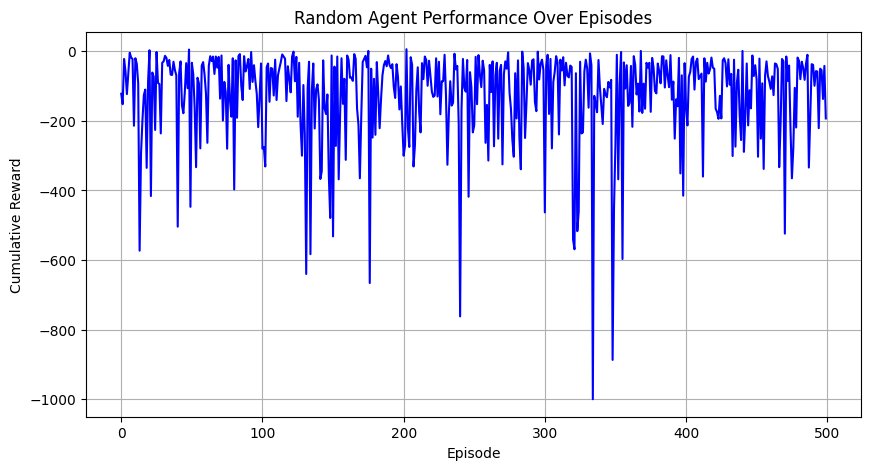

In [ ]:
# Initialize environment and agent
environment = GridWorld()
random_agent = RandomAgent()

# Run 500 episodes and collect rewards
reward_per_episode = play(environment, random_agent, trials=500)

# Plot learning/performance curve
plt.figure(figsize=(10,5))
plt.plot(reward_per_episode, color='blue')
plt.title("Random Agent Performance Over Episodes")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.grid(True)
plt.show()

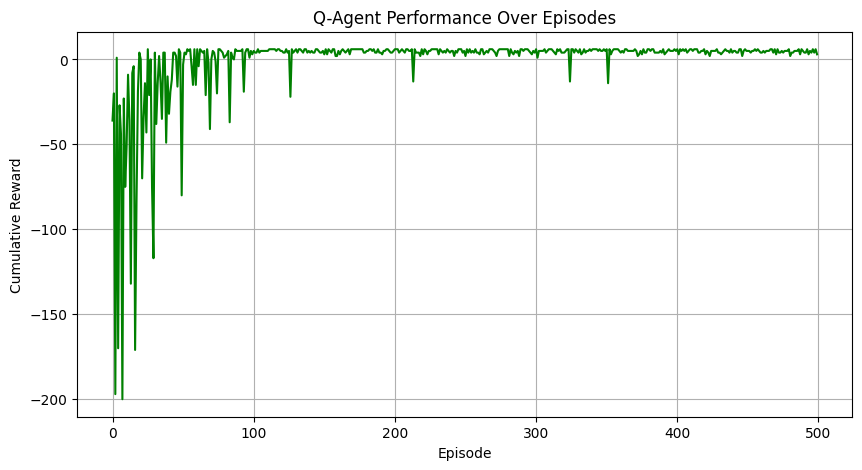

In [ ]:
environment = GridWorld()
agentQ = Q_Agent(environment)

# Run 500 episodes with learning enabled
reward_per_episode = play(environment, agentQ, trials=500, learn=True)

# Plot learning/performance curve
plt.figure(figsize=(10,5))
plt.plot(reward_per_episode, color='green')
plt.title("Q-Agent Performance Over Episodes")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.grid(True)
plt.show()

In [ ]:
def pretty(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            pretty(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))
pretty(agentQ.q_table)

(0, 0)
	UP
		-0.4
	DOWN
		-0.41848819000000004
	LEFT
		-0.4
	RIGHT
		-0.2745048716996666
(0, 1)
	UP
		-0.2
	DOWN
		-0.2
	LEFT
		-0.2
	RIGHT
		4.873202397124882
(0, 2)
	UP
		0.8099999999999993
	DOWN
		2.392990859002519
	LEFT
		0.9243664979047476
	RIGHT
		9.999999999999993
(0, 3)
	UP
		0
	DOWN
		0
	LEFT
		0
	RIGHT
		0
(0, 4)
	UP
		0.8998709929921831
	DOWN
		1.0614949895149566
	LEFT
		9.999992612520908
	RIGHT
		0.1577478402001189
(0, 5)
	UP
		-0.1
	DOWN
		-0.1
	LEFT
		3.076683835780723
	RIGHT
		0
(0, 6)
	UP
		-0.2
	DOWN
		-0.2101
	LEFT
		-0.054772914429699865
	RIGHT
		-0.2
(0, 7)
	UP
		-0.30000000000000004
	DOWN
		-0.30900000000000005
	LEFT
		-0.37607303000000003
	RIGHT
		-0.30000000000000004
(1, 0)
	UP
		-0.6333041000000001
	DOWN
		-0.6675623538209999
	LEFT
		-0.6
	RIGHT
		-0.5658294332000001
(1, 1)
	UP
		-0.35726410000000003
	DOWN
		-0.4516339
	LEFT
		-0.4
	RIGHT
		2.1540578808208024
(1, 2)
	UP
		8.99999999999998
	DOWN
		2.650101486842092
	LEFT
		-0.28320943379033797
	RIGHT
		-3.439
(1,